# Demographic-Based Segmentation 



In [1]:
## Our standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
def evaluate_regression(model, X_train,y_train, X_test, y_test): 
    """Evaluates a scikit learn regression model using r-squared and RMSE"""
    
    ## Training Data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, 
                                            squared=False)
    
    print(f"Training Data:\tR^2= {r2_train:.2f}\tRMSE= {rmse_train:.2f}")
        
    
    ## Test Data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, 
                                            squared=False)
    
    print(f"Test Data:\tR^2= {r2_test:.2f}\tRMSE= {rmse_test:.2f}")

## Load the data and Data Cleaning

In [4]:
# Reload the CSV file 
file_path_trends = 'shopping_trends.csv'
file_path_behavior = 'shopping_behavior_updated.csv'

# reading the data from the files
df_shopping_behavior = pd.read_csv(file_path_behavior)
df_shopping_trends = pd.read_csv(file_path_trends)

# displaying the first rows of the two datas
df_shopping_trends.head()
df_shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [25]:
###Check for unknown values
#df[df == 'Unknown'].count()

In [5]:
df_shopping_behavior.shape
df_shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [6]:
# checking for missing values
df_shopping_behavior.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [65]:
# Convert categorical variables to appropriate data types
df_shopping_behavior['Gender'] = df_shopping_behavior['Gender'].astype('category')
df_shopping_behavior['Location'] = df_shopping_behavior['Location'].astype('category')
# Repeat for other categorical variables

# Drop irrelevant columns
df_shopping_behavior = df_shopping_behavior.drop(['Customer ID', 'Item Purchased', 'Category'], axis=1)

In [66]:
# Removing duplicates
# Check for duplicates
df_shopping_behavior.duplicated().sum()

0

## Exploratory Data Analysis (EDA)

In [67]:
# summary statistics 
df_shopping_behavior.describe()

,Age,Purchase Amount (USD),Review Rating,Previous Purchases,Cluster
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,44.068462,59.764359,3.749949,25.351538,0.986410
std,15.207589,23.685392,0.716223,14.447125,0.786896
min,18.000000,20.000000,2.500000,1.000000,0.000000
25%,31.000000,39.000000,3.100000,13.000000,0.000000
50%,44.000000,60.000000,3.700000,25.000000,1.000000
75%,57.000000,81.000000,4.400000,38.000000,2.000000
max,70.000000,100.000000,5.000000,50.000000,2.000000


### Age Distribution 

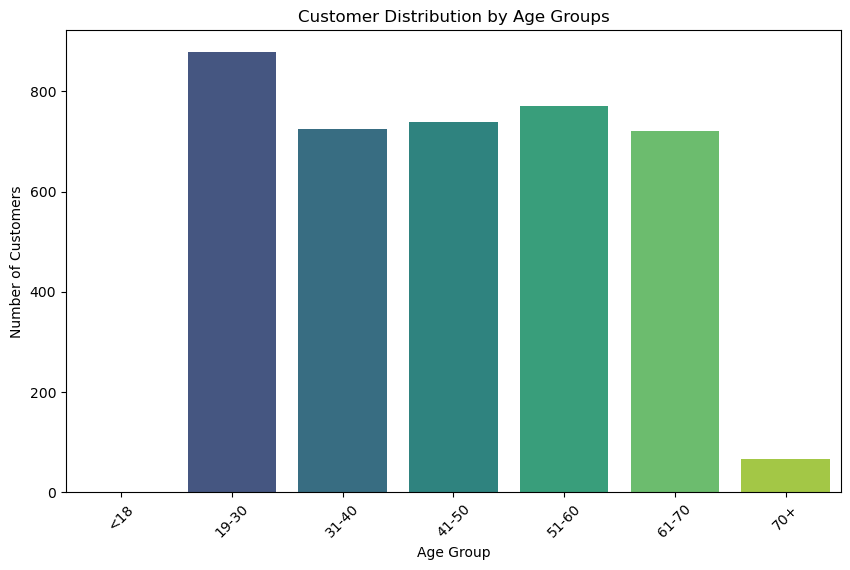

In [68]:
bins = [0, 18, 30, 40, 50, 60, 70, 100]
labels = ['<18', '19-30', '31-40', '41-50', '51-60', '61-70', '70+']
df_shopping_behavior['Age_Group'] = pd.cut(df_shopping_behavior['Age'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(10, 6))
sns.countplot(x='Age_Group', data=df_shopping_behavior, palette='viridis')
plt.title('Customer Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()

### Gender Distribution by age

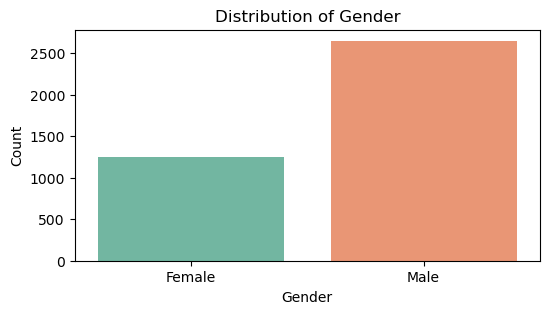

In [69]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Gender', data=df_shopping_behavior, palette='Set2')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

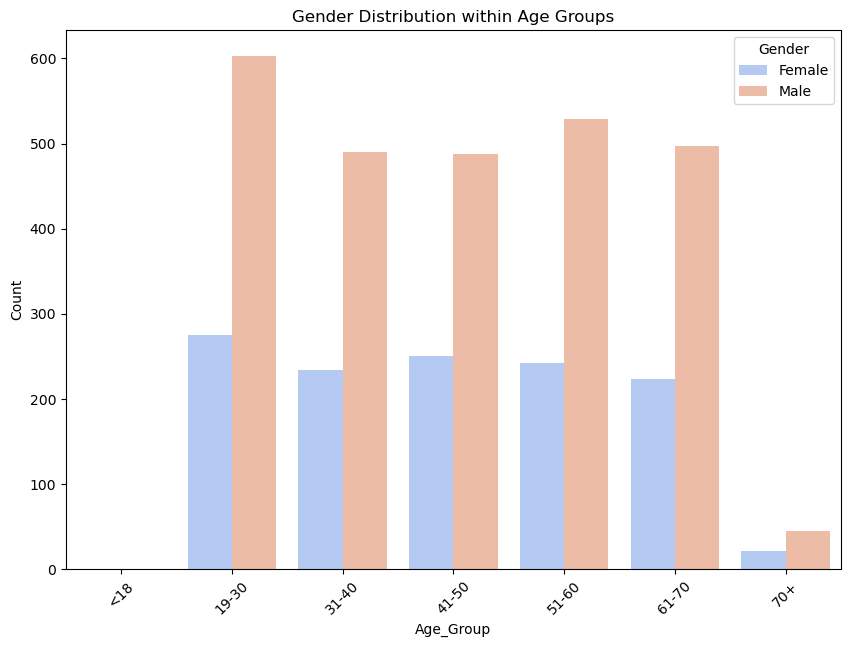

In [70]:
plt.figure(figsize=(10,7))
sns.countplot(x='Age_Group', hue='Gender', data=df_shopping_behavior, palette='coolwarm')
plt.title('Gender Distribution within Age Groups')
plt.xlabel('Age_Group')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=45)
plt.show()

### Purchase Amount Distribution

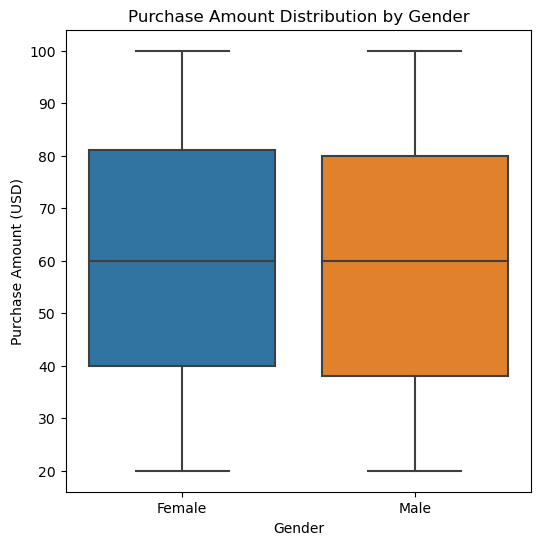

In [71]:
plt.figure(figsize=(6, 6))
sns.boxplot(x='Gender', y='Purchase Amount (USD)', data=df_shopping_behavior)
plt.title('Purchase Amount Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Purchase Amount (USD)')
plt.show()


### Correlation Analysis

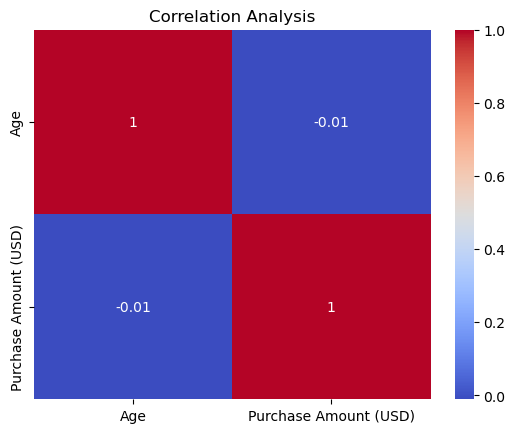

In [75]:
correlation_matrix = df_shopping_behavior[['Age', 'Purchase Amount (USD)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Analysis')
plt.show()


### Seasonal Purchase Behavior

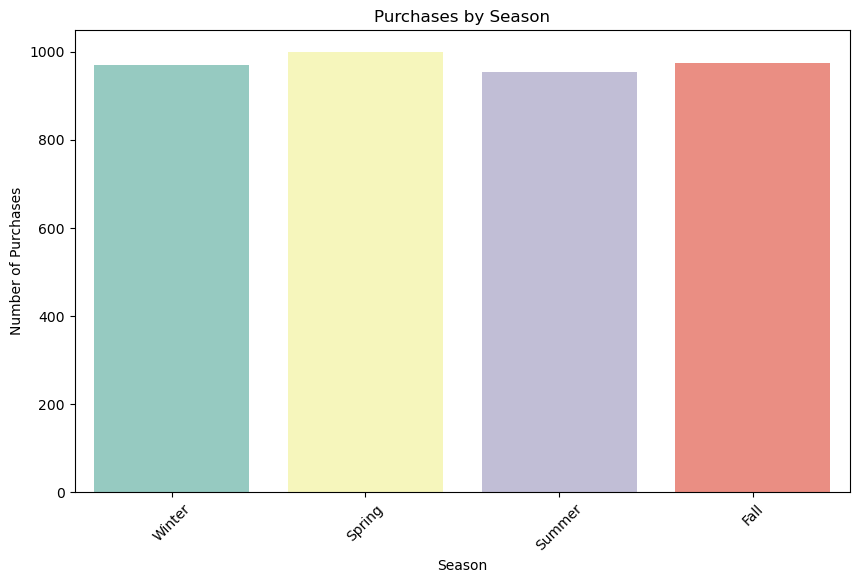

In [76]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Season', data=df_shopping_behavior, palette='Set3')
plt.title('Purchases by Season')
plt.xlabel('Season')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()


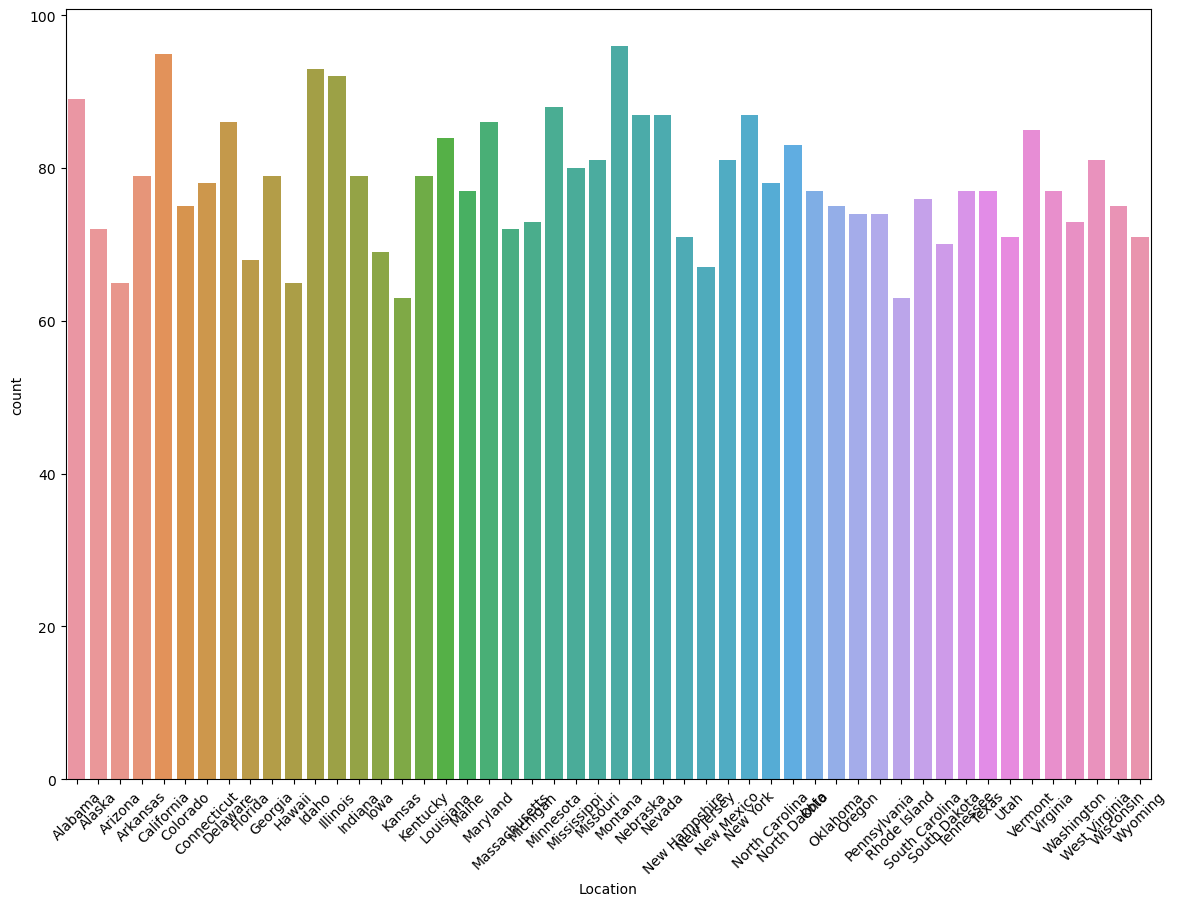

In [77]:
plt.figure(figsize=(14, 10))
sns.countplot(x='Location', data=df_shopping_behavior)
plt.xticks(rotation=45)
plt.show()

## K-means Clustering

In [78]:
# converting categorical variables to appropriate data types
df_shopping_behavior['Gender'] = df_shopping_behavior['Gender'].astype('category')
df_shopping_behavior['Location'] = df_shopping_behavior['Location'].astype('category')

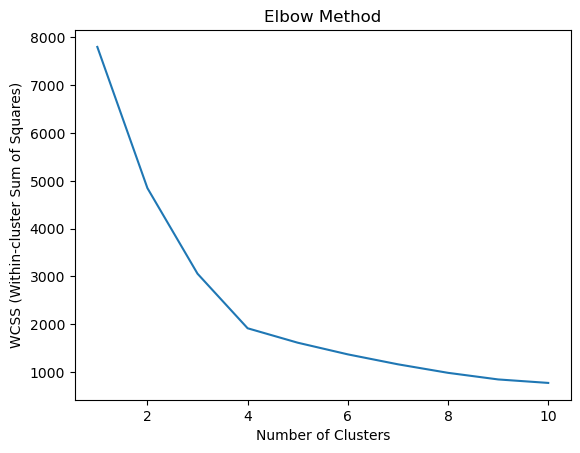

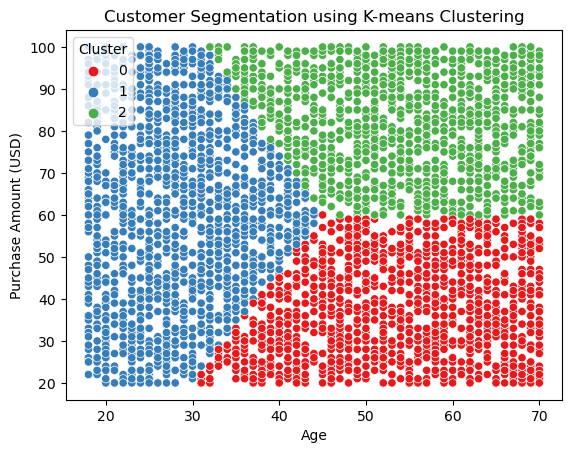

In [79]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# selecting relevant features for clustering
X = df_shopping_behavior[['Age', 'Purchase Amount (USD)']]

# standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# finding out the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-cluster Sum of Squares)')
plt.show()

# From the Elbow plot, finding the optimal number of clusters
# Will choose 3 clusters

# Fitting K-means clustering algorithm with the chosen number of clusters
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the dataframe
df_shopping_behavior['Cluster'] = kmeans.labels_

# Visualize the clusters
sns.scatterplot(x='Age', y='Purchase Amount (USD)', hue='Cluster', data=df_shopping_behavior, palette='Set1')
plt.title('Customer Segmentation using K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Purchase Amount (USD)')
plt.legend(title='Cluster')
plt.show()

In [80]:
# interpreting cluster results
centroids = kmeans.cluster_centers_
centroids

array([[ 0.61756097, -0.94223562],
       [-1.04330674,  0.04428856],
       [ 0.66393227,  0.93686681]])

In [81]:
# defining function to assign labels based on cluster characteristics

def assign_cluster_labels(cluster_means):
    labels = []
    for idx, row in cluster_means.iterrows():
        # criteria for assigning labels
        if row['Age'] > 35 and row['Purchase Amount (USD)'] > 55:
            labels.append('High-Spending Adults')
        elif row['Age'] < 30 and row['Purchase Amount (USD)'] < 54:
            labels.append('Young Budget Shoppers')
        else:
            labels.append('Other')
    return labels

# Calculate mean feature values for each cluster
cluster_means = df_shopping_behavior.groupby('Cluster').mean()

# Assign labels to clusters
cluster_labels = assign_cluster_labels(cluster_means)

# Add cluster labels to the DataFrame
cluster_means['Cluster Label'] = cluster_labels


/var/folders/mm/04nbg7g95pgdtd1s3081zgfh0000gn/T/ipykernel_18718/1230582244.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_shopping_behavior.groupby('Cluster').mean()


In [82]:
# defining function to assign labels based on cluster characteristics

for idx, row in cluster_means.iterrows():
    # Example criteria for assigning labels
    if row['Age'] > 35 and row['Purchase Amount (USD)'] > 55:
        df_shopping_behavior.loc[df_shopping_behavior['Cluster'] == idx, 'Cluster Label'] = 'High-Spending Adults'
    elif row['Age'] < 30 and row['Purchase Amount (USD)'] < 54:
        df_shopping_behavior.loc[df_shopping_behavior['Cluster'] == idx, 'Cluster Label'] = 'Young Budget Shoppers'
    else:
        df_shopping_behavior.loc[df_shopping_behavior['Cluster'] == idx, 'Cluster Label'] = 'General Shoppers'
        
# Calculate mean feature values for each cluster
cluster_means = df_shopping_behavior.groupby('Cluster').mean()

# Assign labels to clusters
cluster_labels = assign_cluster_labels(cluster_means)

# Add cluster labels to the DataFrame
cluster_means['Cluster Label'] = cluster_labels
        
df_shopping_behavior['Cluster Label'][:10]


/var/folders/mm/04nbg7g95pgdtd1s3081zgfh0000gn/T/ipykernel_18718/1826073592.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = df_shopping_behavior.groupby('Cluster').mean()


0        General Shoppers
1        General Shoppers
2    High-Spending Adults
3        General Shoppers
4        General Shoppers
5        General Shoppers
6    High-Spending Adults
7        General Shoppers
8        General Shoppers
9        General Shoppers
Name: Cluster Label, dtype: object

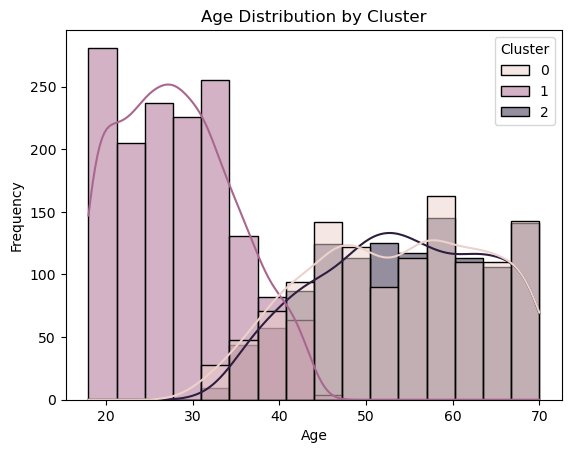

            Age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Cluster                                                               
0        1234.0  53.505673  10.095427  31.0  46.0  54.0  62.0  70.0   
1        1485.0  28.218182   6.578948  18.0  23.0  28.0  33.0  44.0   
2        1181.0  54.138019   9.615511  32.0  47.0  54.0  62.0  70.0   

        Purchase Amount (USD)             ... Review Rating       \
                        count       mean  ...           75%  max   
Cluster                                   ...                      
0                      1234.0  37.371961  ...           4.3  5.0   
1                      1485.0  60.781818  ...           4.4  5.0   
2                      1181.0  81.882303  ...           4.4  5.0   

        Previous Purchases                                                     
                     count       mean        std  min   25%   50%   75%   max  
Clus

In [83]:
# analyzing Cluster Characteristics
cluster_summary = df_shopping_behavior.groupby('Cluster').describe()

# visualize Variable Distributions


# Histogram of Age distribution by Cluster
sns.histplot(data=df_shopping_behavior, x='Age', hue='Cluster', kde=True)
plt.title('Age Distribution by Cluster')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# interpreting the results
# exploring cluster means, medians, or other summary statistics
print(cluster_summary)

## Interpretation of the Results

### Age Distribution: 
- Cluster 0: The mean age is around 53 years old, with a standard deviation of approximately 10 years. This cluster primarily consists of older adults, with ages ranging from 31 to 70 years old.
- Cluster 1: The mean age is approximately 28 years old, with a narrower age range compared to Cluster 0. This cluster represents younger adults, with ages ranging from 18 to 44 years old.
- Cluster 2: Similar to Cluster 0, the mean age is around 54 years old, indicating an older demographic profile.

### Purchase Amount:
- Cluster 0: Customers in this cluster have a relatively lower average purchase amount (mean of 37.37 USD)    
- Cluster 1: This cluster shows a moderate average purchase amount (mean of 60.78 USD), a medium-spending group.
- Cluster 2: Customers in this cluster exhibit the highest average purchase amount (mean of 81.88 USD), a high-spending segment.

### Review Ratings:
- All clusters have relatively high review ratings, with 75th percentile ratings ranging from 4.3 to 4.4, indicating overall satisfaction with purchases.

### Previous Purchases:
- Across all clusters, the average number of previous purchases is similar, ranging from approximately 25 to 26 purchases. The standard deviation indicates some variability in the number of previous purchases within each cluster.

### Comparison:
- Clusters 0 and 2 have similar age distributions and average review ratings, but differ significantly in terms of purchase amount. Cluster 2 consists of high-spending customers compared to Cluster 0.
- Cluster 1 represents a younger demographic profile with moderate purchasing behavior.



